In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.graph_objects as go
import random
pd.options.display.max_columns=1000000
pd.options.display.max_rows=100

In [2]:
file = 'arcos_all_washpost.tsv'

In [3]:
#Our file is enormous, so let's take a random sample from it

#How do you ensure reproducibility? The answer is 42
random.seed(42)

n = sum(1 for line in open(file)) - 1 #number of records in file (excludes header)
s = 1000000 #desired sample size

#variable skip is essentially the whole data file, minus our sample
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list

#using skip as the argument for skiprows shrinks our dataframe down to the desired sample size
df = pd.read_csv(file, skiprows=skip, sep='\t',low_memory=False)

In [3]:
# alternate method for taking random sample from file

#"""
p = 0.01  # set p to whatever percentage of lines necessary
# keep the header, then take only p% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(file, sep = '\t', skiprows=lambda i: i>0 and random.random() > p, low_memory=False)

#"""

In [4]:
df.head()

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,BUYER_DEA_NO,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_STATE,BUYER_ZIP,BUYER_COUNTY,TRANSACTION_CODE,DRUG_CODE,NDC_NO,DRUG_NAME,QUANTITY,UNIT,ACTION_INDICATOR,ORDER_FORM_NO,CORRECTION_NO,STRENGTH,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
0,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AB0563709,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #24,3873 ROME ROAD,NaN,PULASKI,NY,13142,OSWEGO,S,9193,00591054005,HYDROCODONE,4.0,NaN,NaN,NaN,NaN,NaN,12082011,12.1080,2000.0,393,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",10.0
1,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AB1113404,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #09,700 CANTON STREET,NaN,OGDENSBURG,NY,13669,SAINT LAWRENCE,S,9193,00591054001,HYDROCODONE,3.0,NaN,NaN,NaN,NaN,0.0,10032009,1.8162,300.0,135,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",10.0
2,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AB4686967,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #19,288 CORNELIA STREET,NaN,PLATTSBURGH,NY,12901,CLINTON,S,9193,00591085301,HYDROCODONE,5.0,NaN,NaN,NaN,NaN,0.0,12032010,3.0270,500.0,141,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",10.0
3,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AK1113416,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #10,300 MAIN STREET,NaN,MASSENA,NY,13662,SAINT LAWRENCE,S,9193,00591085301,HYDROCODONE,9.0,NaN,NaN,NaN,NaN,0.0,11212009,5.4486,900.0,1045,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",10.0
4,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AK1113454,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #16,40 SH 310,NaN,CANTON,NY,13617,SAINT LAWRENCE,S,9193,00591034905,HYDROCODONE,3.0,NaN,NaN,NaN,NaN,0.0,8152009,4.5405,1500.0,779,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",5.0


In [5]:
df.describe(include='all')

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,BUYER_DEA_NO,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_STATE,BUYER_ZIP,BUYER_COUNTY,TRANSACTION_CODE,DRUG_CODE,NDC_NO,DRUG_NAME,QUANTITY,UNIT,ACTION_INDICATOR,ORDER_FORM_NO,CORRECTION_NO,STRENGTH,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
count,1785466,1785466,1785466,63508,1785466,742092,1785466,1785466,1.785466e+06,1785466,1785466,1785466,1785466,797823,1785466,369103,1785466,1785466,1.785466e+06,1785447,1785466,1.785466e+06,1785466,1785466,1.785466e+06,1.0,5787,689475,6.040000e+02,441695.000000,1.785466e+06,1.785466e+06,1.785466e+06,1.785466e+06,1785466,1785466,1785466,1.785466e+06,1784953,1784953,1785466,1.782239e+06
unique,508,3,366,87,469,158,345,48,NaN,211,84602,6,47425,32095,77127,16331,9266,55,NaN,1834,1,NaN,1720,2,NaN,NaN,2,507156,NaN,NaN,NaN,NaN,NaN,NaN,699,3,1,NaN,85,81,280,NaN
top,RW0294493,DISTRIBUTOR,MCKESSON CORPORATION,D/B/A RITE AID LIVERPOOL DISTRIBUTION CENTER (...,DBA MCKESSON DRUG CO.,ATTN: C II MANAGER,ROGERS,CA,NaN,BENTON,BK4844658,CHAIN PHARMACY,WALGREEN CO.,ATTN PHARMACY,ATTN: PHARMACY,SUITE A,HOUSTON,CA,NaN,LOS ANGELES,S,NaN,00406035705,HYDROCODONE,NaN,NaN,I,000000000,NaN,NaN,NaN,NaN,NaN,NaN,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,NaN,SpecGx LLC,Mallinckrodt,McKesson Corporation,NaN
freq,61123,1780420,368768,7491,209312,61123,98991,197175,NaN,98991,489,1163565,210663,3048,23703,5167,12032,138102,NaN,27986,1785466,NaN,96681,1096351,NaN,NaN,5702,329,NaN,NaN,NaN,NaN,NaN,NaN,125253,1096351,1785466,NaN,654476,654476,376437,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.073480e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.018731e+04,NaN,NaN,9.173702e+03,NaN,NaN,2.699394e+00,2.0,NaN,NaN,5.473984e+06,25.549827,6.745707e+06,3.216109e+00,4.297565e+02,4.710868e+08,NaN,NaN,NaN,1.192979e+00,NaN,NaN,NaN,1.170636e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.777613e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.799793e+04,NaN,NaN,2.434104e+01,NaN,NaN,1.748841e+01,NaN,NaN,NaN,9.844835e+06,158.764250,3.437500e+06,8.274545e+00,1.231445e+03,5.023199e+08,NaN,NaN,NaN,2.434104e-01,NaN,NaN,NaN,1.295298e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.050000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.010000e+02,NaN,NaN,9.143000e+03,NaN,NaN,1.000000e+00,2.0,NaN,NaN,2.000000e+00,0.000000,1.012006e+06,1.021610e-04,2.250000e-02,1.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,2.500000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.009600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.905400e+04,NaN,NaN,9.143000e+03,NaN,NaN,1.000000e+00,2.0,NaN,NaN,4.145250e+03,0.000000,4.042011e+06,6.054000e-01,1.000000e+02,1.590925e+04,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,5.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.584000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.601100e+04,NaN,NaN,9.193000e+03,NaN,NaN,1.000000e+00,2.0,NaN,NaN,1.268650e+04,0.000000,7.052007e+06,1.793000e+00,2.000000e+02,6.020084e+08,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,7.500000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.317900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.546000e+04,NaN,NaN,9.193000e+03,NaN,NaN,3.000000e+00,2.0,NaN,NaN,3.287928e+05,0.000000,1.003201e+07,3.027000e+00,5.000000e+02,9.110067e+08,NaN,NaN,NaN,1.500000e+00,NaN,NaN,NaN,1.000000e+01


In [6]:
df.shape

(1785466, 42)

In [7]:
cols = ['BUYER_CITY','BUYER_COUNTY','BUYER_STATE','BUYER_ZIP',
        'DRUG_NAME','QUANTITY','TRANSACTION_DATE']
df = df.loc[:,cols]

In [8]:
df.head()

,BUYER_CITY,BUYER_COUNTY,BUYER_STATE,BUYER_ZIP,DRUG_NAME,QUANTITY,TRANSACTION_DATE
0,PULASKI,OSWEGO,NY,13142,HYDROCODONE,4.0,12082011
1,OGDENSBURG,SAINT LAWRENCE,NY,13669,HYDROCODONE,3.0,10032009
2,PLATTSBURGH,CLINTON,NY,12901,HYDROCODONE,5.0,12032010
3,MASSENA,SAINT LAWRENCE,NY,13662,HYDROCODONE,9.0,11212009
4,CANTON,SAINT LAWRENCE,NY,13617,HYDROCODONE,3.0,8152009


In [9]:
#check outlier value for quantity
mx = df.loc[df.QUANTITY == df.QUANTITY.max()]
print(mx)

        BUYER_CITY BUYER_COUNTY BUYER_STATE  BUYER_ZIP    DRUG_NAME  QUANTITY  \
1101000     DOWNEY  LOS ANGELES          CA      90242  HYDROCODONE    9000.0   

         TRANSACTION_DATE  
1101000           8272011  


In [10]:
df.dtypes

BUYER_CITY           object
BUYER_COUNTY         object
BUYER_STATE          object
BUYER_ZIP             int64
DRUG_NAME            object
QUANTITY            float64
TRANSACTION_DATE      int64
dtype: object

In [11]:
df['BUYER_ZIP'] = df['BUYER_ZIP'].astype(str)

In [12]:
for i, zip_code in enumerate(df['BUYER_ZIP']):
    if len(str(zip_code)) == 4:
        x = '0' + str(zip_code)
        #print(x)
        df['BUYER_ZIP'].values[i] = x
    elif len(str(zip_code)) == 3:
        x = '00' + str(zip_code)
        #print(x)
        df['BUYER_ZIP'].values[i] = x

In [13]:
df['TRANSACTION_DATE'] = df["TRANSACTION_DATE"].astype(int).astype(str)

In [14]:
for i, date in enumerate(df['TRANSACTION_DATE']):
    if len(date) == 7:
        df['TRANSACTION_DATE'].values[i] = '0' + date

In [15]:
#We want to convert datetime to a year column to make it easier to join with overdose data and do time analysis
df['date'] = pd.to_datetime(df['TRANSACTION_DATE'],format = '%m%d%Y')
df.head()
df['year'] = df['date'].dt.year

In [16]:
df_nan = df.loc[df.isnull().any(axis=1)]
df_nan

,BUYER_CITY,BUYER_COUNTY,BUYER_STATE,BUYER_ZIP,DRUG_NAME,QUANTITY,TRANSACTION_DATE,date,year
107192,NORTH LAS VEGAS,NaN,NV,89303,HYDROCODONE,15.0,05092007,2007-05-09,2007
156236,NORTH LAS VEGAS,NaN,NV,89303,HYDROCODONE,8.0,03152006,2006-03-15,2006
194160,FAIRFIELD,NaN,CT,06430,OXYCODONE,4.0,02012006,2006-02-01,2006
225231,CAIRO,NaN,GA,31728,HYDROCODONE,1.0,03022006,2006-03-02,2006
496813,NORTH LAS VEGAS,NaN,NV,89303,HYDROCODONE,8.0,10122007,2007-10-12,2007
521649,ORANGE,NaN,CA,92669,HYDROCODONE,1.0,01302006,2006-01-30,2006
573589,CAIRO,NaN,GA,31728,HYDROCODONE,1.0,01262006,2006-01-26,2006
732976,NORTH LAS VEGAS,NaN,NV,89303,HYDROCODONE,5.0,01252006,2006-01-25,2006
766739,FAIRFIELD,NaN,CT,06430,OXYCODONE,3.0,06142006,2006-06-14,2006
971342,FAIRFIELD,NaN,CT,06430,OXYCODONE,2.0,10302007,2007-10-30,2007


In [17]:
df = df.dropna()

In [18]:
sum_state = df.groupby(['BUYER_STATE', 'year'], as_index = False)['QUANTITY'].sum()

In [19]:
sum_state.head()

,BUYER_STATE,year,QUANTITY
0,AK,2006,1204.0
1,AK,2007,1286.0
2,AK,2008,1478.0
3,AK,2009,1383.0
4,AK,2010,1745.0


In [20]:
sum_state.describe(include='all')

,BUYER_STATE,year,QUANTITY
count,385,385.000000,385.000000
unique,55,NaN,NaN
top,NE,NaN,NaN
freq,7,NaN,NaN
mean,NaN,2009.000000,12518.444156
std,NaN,2.002602,14526.678500
min,NaN,2006.000000,2.000000
25%,NaN,2007.000000,2650.000000
50%,NaN,2009.000000,8905.000000
75%,NaN,2011.000000,16692.000000


In [21]:
od_df = pd.read_csv('opioid_death_1999-2014.csv')

In [22]:
od_df.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [23]:
od_df.dtypes

State                                                              object
Year                                                                int64
Deaths                                                             object
Population                                                          int64
Crude Rate                                                         object
Crude Rate Lower 95% Confidence Interval                           object
Crude Rate Upper 95% Confidence Interval                           object
Prescriptions Dispensed by US Retailers in that year (millions)     int64
dtype: object

In [24]:
od_df = od_df.replace('Suppressed', np.nan)
df_df = od_df.fillna(inplace=True, method='bfill')

In [25]:
od_df.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [26]:
#create state dictionary
state_dict = { 'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

In [27]:
#use .map() to change state abbreviations to full names
sum_state.BUYER_STATE = sum_state.BUYER_STATE.map(state_dict)

In [28]:
# rename BUYER_STATE column
sum_state.rename(columns = {'BUYER_STATE': 'state'}, inplace=True)

In [29]:
# rename state and year columns in od_df
od_df.rename(columns = {'State' : 'state', 'Year' : 'year', 'Population' : 'pop', 'Deaths' : 'deaths'}, inplace=True)

In [30]:
sum_state.head()

,state,year,QUANTITY
0,Alaska,2006,1204.0
1,Alaska,2007,1286.0
2,Alaska,2008,1478.0
3,Alaska,2009,1383.0
4,Alaska,2010,1745.0


In [31]:
merge_df = od_df.merge(sum_state, how='inner', on = ['state', 'year'])

In [32]:
# create new columns for prescription rate and overdose rate
merge_df['prescription_rate'] = (merge_df['QUANTITY'] / merge_df['pop'])* 100000

In [33]:
#convert deaths column to type int, then use it to compute overdose rate
merge_df['deaths'] = merge_df['deaths'].astype(int)
merge_df['overdose_rate'] = (merge_df['deaths'] / merge_df['pop'])* 100000

In [34]:
merge_df.head()

,state,year,deaths,pop,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),QUANTITY,prescription_rate,overdose_rate
0,Alabama,2006,134,4628981,2.9,2.4,3.4,174,8172.0,176.539934,2.894806
1,Alabama,2007,172,4672840,3.7,3.1,4.2,184,9972.0,213.403412,3.680845
2,Alabama,2008,195,4718206,4.1,3.6,4.7,196,10957.0,232.228097,4.132927
3,Alabama,2009,210,4757938,4.4,3.8,5,202,12620.0,265.240951,4.413677
4,Alabama,2010,194,4779736,4.1,3.5,4.6,210,13530.0,283.070027,4.058802


In [35]:
merge_df.dtypes

state                                                               object
year                                                                 int64
deaths                                                               int32
pop                                                                  int64
Crude Rate                                                          object
Crude Rate Lower 95% Confidence Interval                            object
Crude Rate Upper 95% Confidence Interval                            object
Prescriptions Dispensed by US Retailers in that year (millions)      int64
QUANTITY                                                           float64
prescription_rate                                                  float64
overdose_rate                                                      float64
dtype: object

In [36]:
merge_df.describe(include='all')

,state,year,deaths,pop,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),QUANTITY,prescription_rate,overdose_rate
count,357,357.000000,357.000000,3.570000e+02,357,357,357,357.000000,357.000000,357.000000,357.000000
unique,51,NaN,NaN,NaN,127,122,128,NaN,NaN,NaN,NaN
top,Rhode Island,NaN,NaN,NaN,10.4,4.5,6.1,NaN,NaN,NaN,NaN
freq,7,NaN,NaN,NaN,11,11,10,NaN,NaN,NaN,NaN
mean,NaN,2009.000000,418.319328,6.007642e+06,NaN,NaN,NaN,200.285714,13485.487395,231.672673,7.700868
std,NaN,2.002807,406.064974,6.714723e+06,NaN,NaN,NaN,15.612302,14653.346288,81.060450,4.077613
min,NaN,2006.000000,10.000000,5.226670e+05,NaN,NaN,NaN,174.000000,427.000000,74.822887,0.651012
25%,NaN,2007.000000,107.000000,1.584985e+06,NaN,NaN,NaN,184.000000,3670.000000,176.408047,4.879866
50%,NaN,2009.000000,339.000000,4.302665e+06,NaN,NaN,NaN,202.000000,9888.000000,221.283501,7.059284
75%,NaN,2011.000000,584.000000,6.587536e+06,NaN,NaN,NaN,217.000000,17230.000000,278.201596,9.578070


In [37]:
df = merge_df

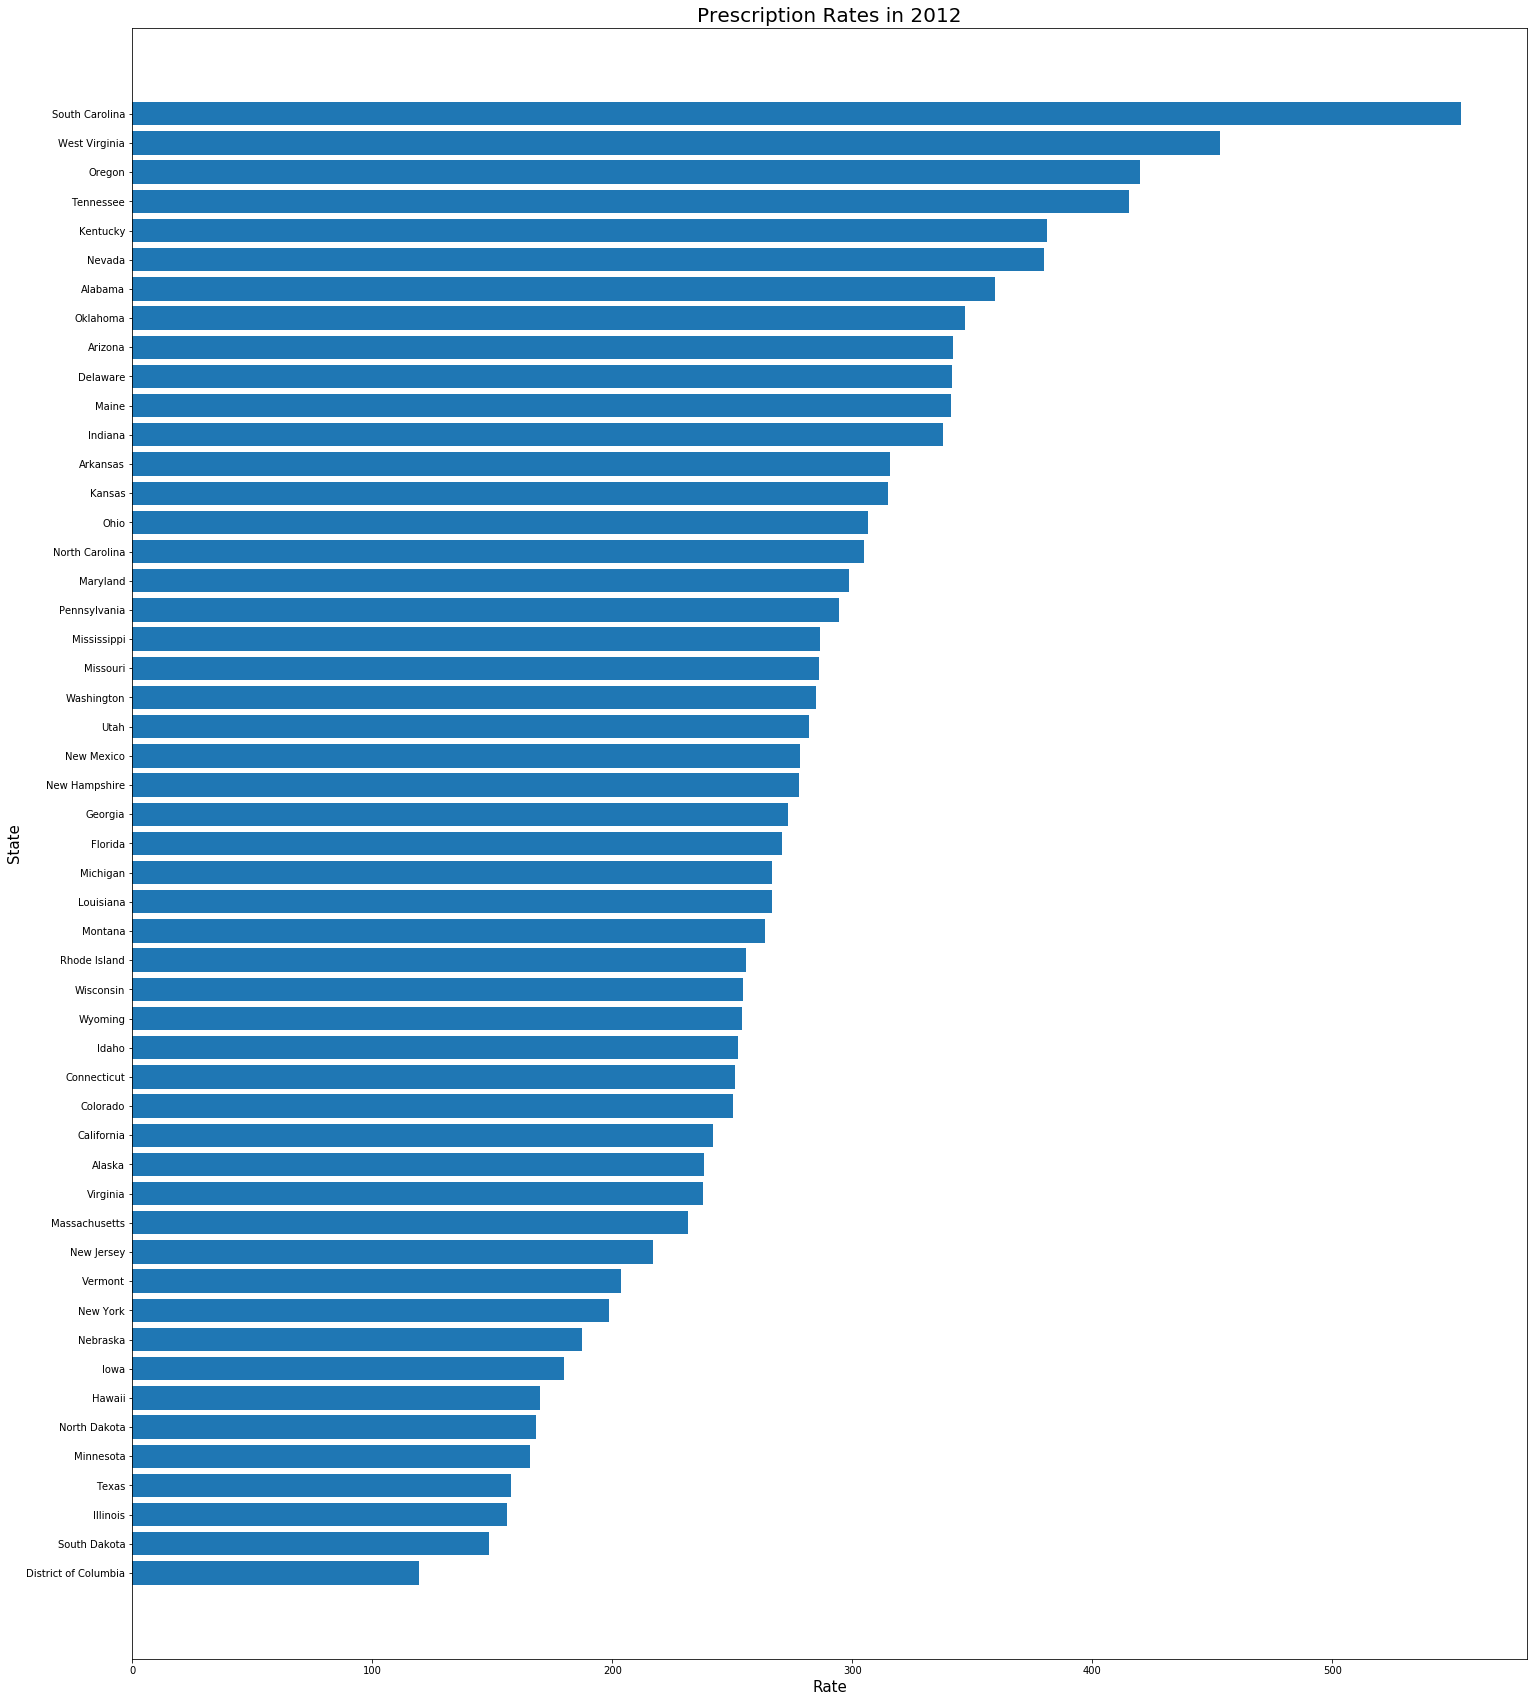

In [39]:
# first select data for year 2012
# sort values for prescription rate and create bar plot
pr_2012 = df.loc[df.year == 2012].sort_values('prescription_rate', ascending=True)
plt.barh(y = pr_2012.state, width = pr_2012.prescription_rate)
plt.xlabel('Rate', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.title('Prescription Rates in 2012', fontsize=20)
plt.rcParams['figure.figsize'] = [25, 30]
plt.show()

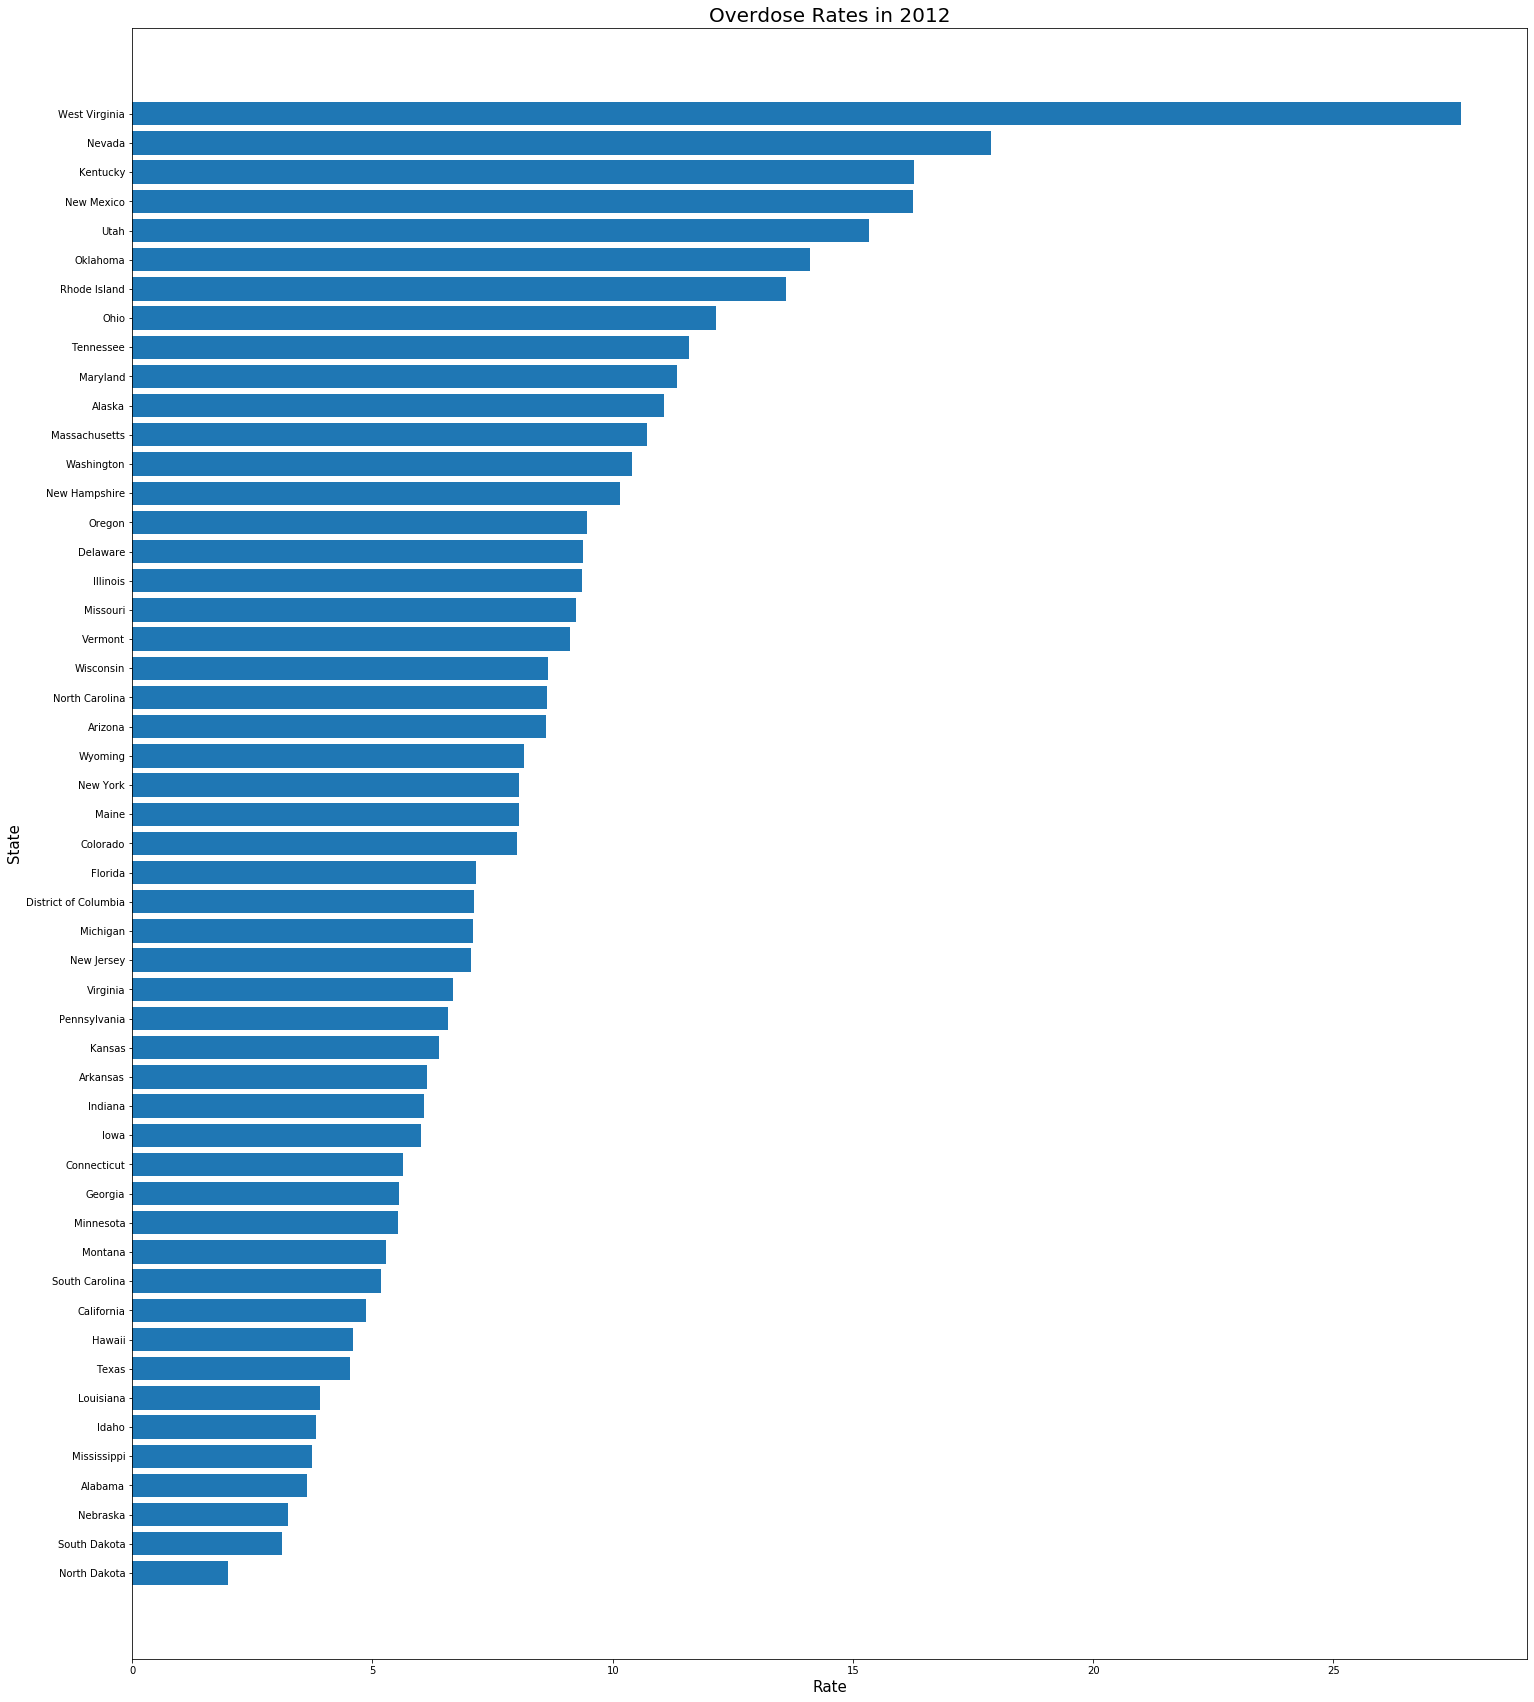

In [40]:
# now for overdose rate
or_2012 = df.loc[df.year == 2012].sort_values('overdose_rate', ascending=True)
plt.barh(y = or_2012.state, width = or_2012.overdose_rate)
plt.xlabel('Rate', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.title('Overdose Rates in 2012', fontsize=20)
plt.rcParams['figure.figsize'] = [25, 30]
plt.show()

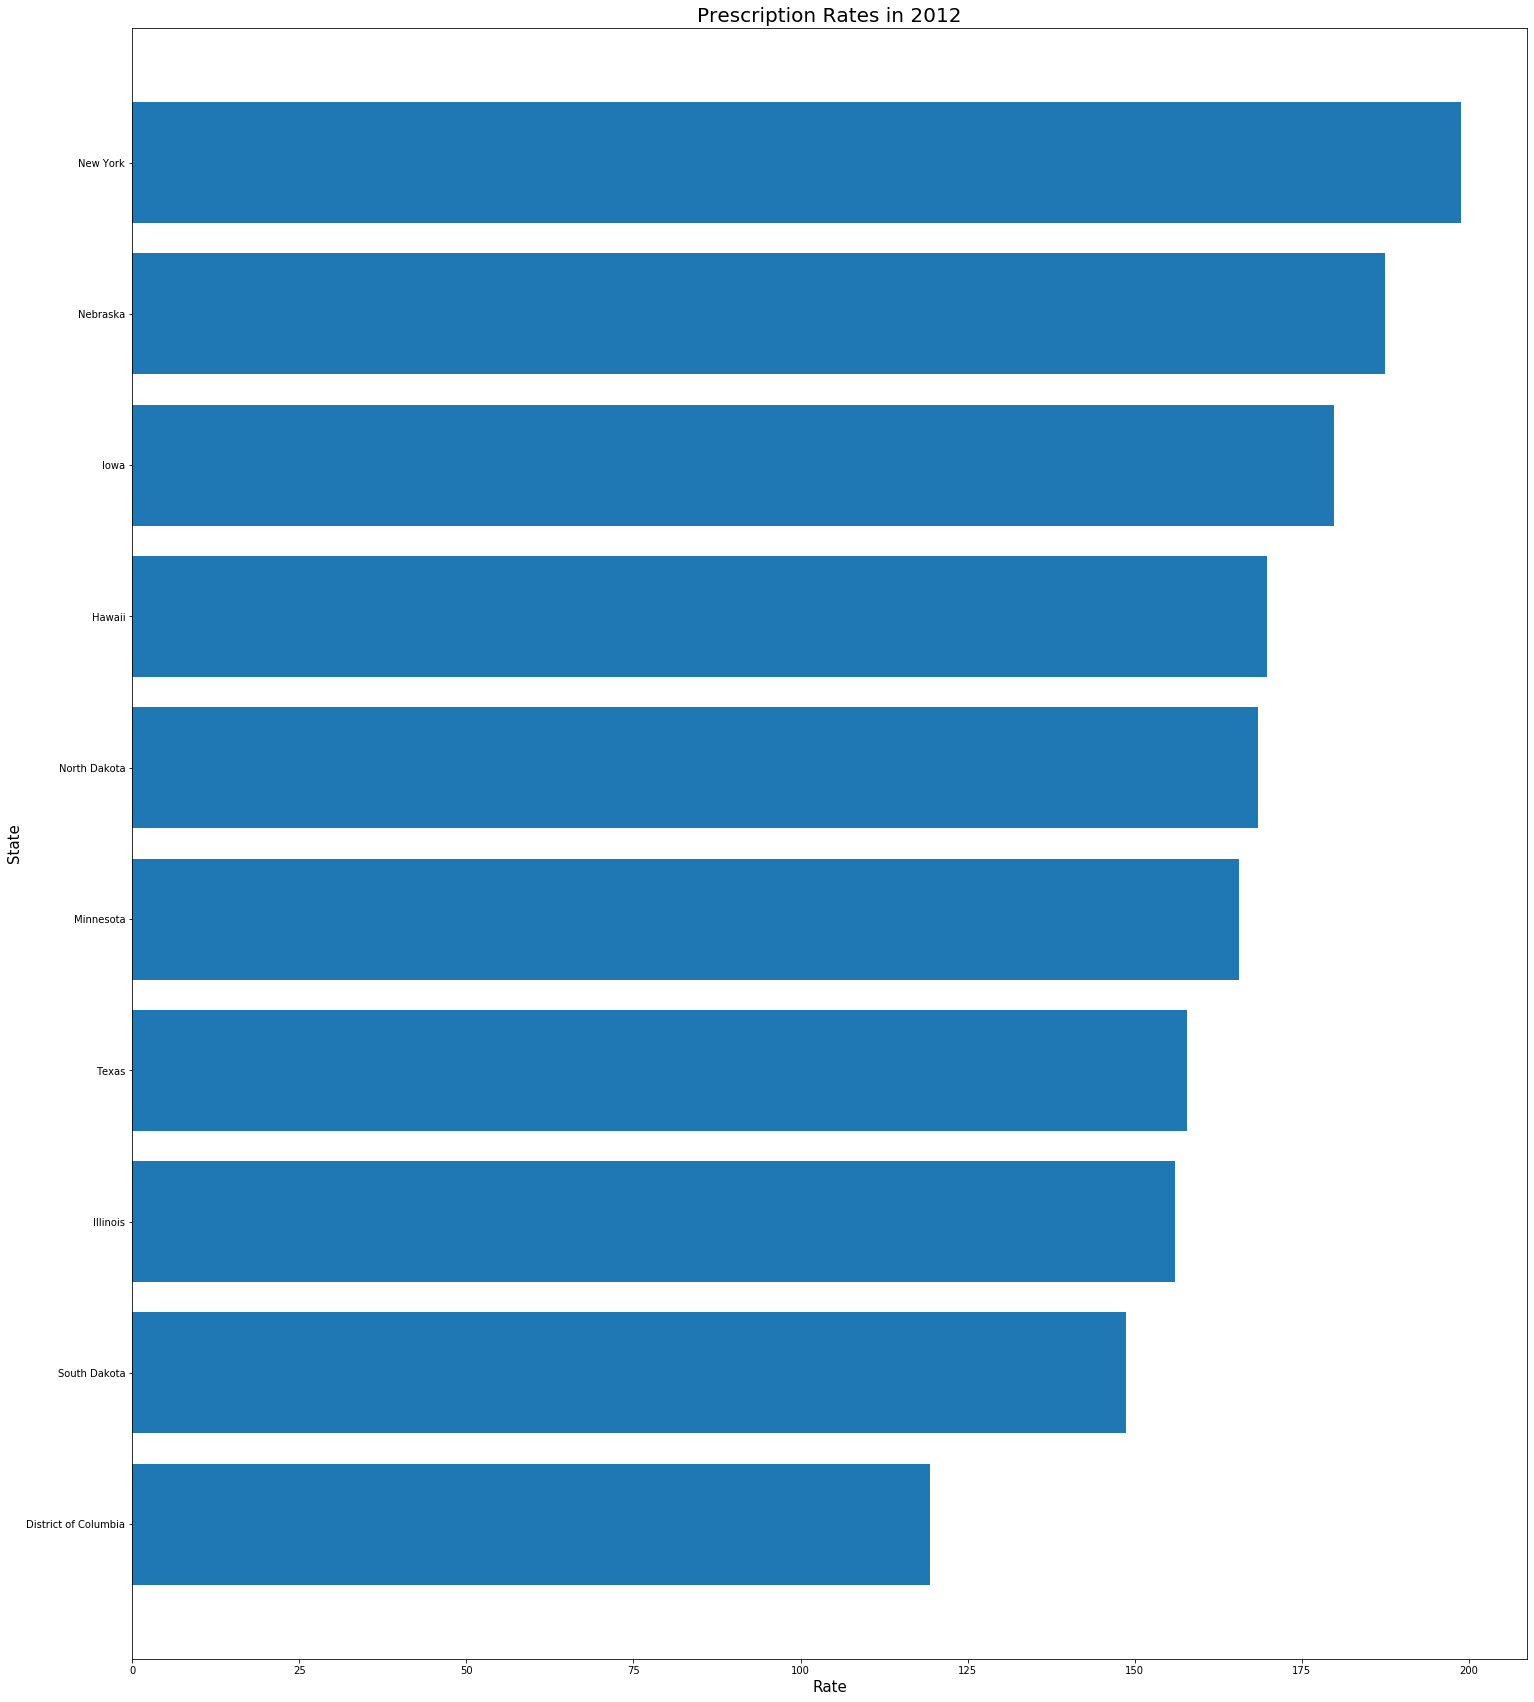

In [41]:
# these graphs are large and difficult to read - let's just look at the top ten states
pr_head = pr_2012.head(10)
plt.barh(y = pr_head.state, width = pr_head.prescription_rate)
plt.xlabel('Rate', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.title('Prescription Rates in 2012', fontsize=20)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

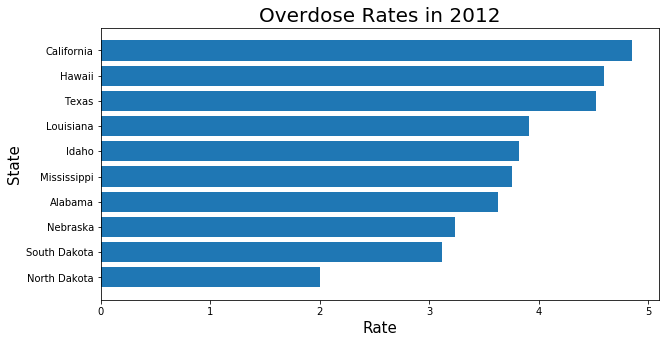

In [42]:
#same for od rate
or_head = df.loc[df.year == 2012].sort_values('overdose_rate', ascending=True).head(10)
plt.barh(y = or_head.state, width = or_head.overdose_rate)
plt.xlabel('Rate', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.title('Overdose Rates in 2012', fontsize=20)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

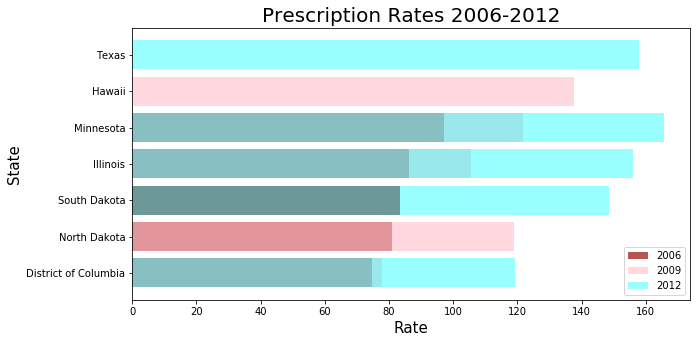

In [43]:
#let's try stacked bar graphs to show multiple years
#create variables to hold values for different years - 2006, 2009, 2012
pr_06 = df.loc[df.year == 2006].sort_values('prescription_rate', ascending=True).head(5)
pr_09 = df.loc[df.year == 2009].sort_values('prescription_rate', ascending=True).head(5)
pr_12 = df.loc[df.year == 2012].sort_values('prescription_rate', ascending=True).head(5)

#then create plots for each year
p1 = plt.barh(y = pr_06.state, width = pr_06.prescription_rate, alpha = 0.8, color = 'brown')
p2 = plt.barh(y = pr_09.state, width = pr_09.prescription_rate, alpha = 0.6, color = 'pink')
p3 = plt.barh(y = pr_12.state, width = pr_12.prescription_rate, alpha = 0.4, color = 'cyan')
plt.xlabel('Rate', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.title('Prescription Rates 2006-2012', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('2006', '2009', '2012'))
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

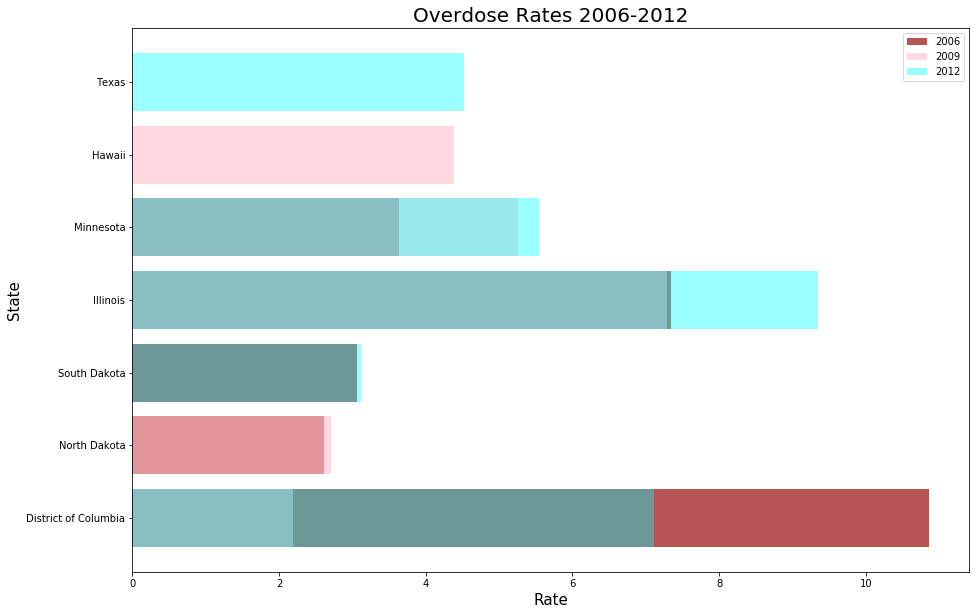

In [44]:
# same process for od rate
od_06 = df.loc[df.year == 2006].sort_values('prescription_rate', ascending=True).head(5)
od_09 = df.loc[df.year == 2009].sort_values('prescription_rate', ascending=True).head(5)
od_12 = df.loc[df.year == 2012].sort_values('prescription_rate', ascending=True).head(5)

p1 = plt.barh(y = od_06.state, width = od_06.overdose_rate, alpha = 0.8, color = 'brown')
p2 = plt.barh(y = od_09.state, width = od_09.overdose_rate, alpha = 0.6, color = 'pink')
p3 = plt.barh(y = od_12.state, width = od_12.overdose_rate, alpha = 0.4, color = 'cyan')
plt.xlabel('Rate', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.title('Overdose Rates 2006-2012', fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('2006', '2009', '2012'))
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [45]:
# directly compare max prescription rate and max overdose rate
max_pr = df.loc[df.prescription_rate == df.prescription_rate.max()]
max_od = df.loc[df.overdose_rate == df.overdose_rate.max()]
max_pr

,state,year,deaths,pop,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),QUANTITY,prescription_rate,overdose_rate
286,South Carolina,2012,245,4723723,5.2,4.5,5.8,217,26149.0,553.567599,5.186587


In [46]:
max_od

,state,year,deaths,pop,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),QUANTITY,prescription_rate,overdose_rate
341,West Virginia,2011,596,1855364,32.1,29.5,34.7,219,7976.0,429.88869,32.123077


In [47]:
# first create prescription rate average, then overdose rate average
pr_avg = df.groupby('year')['prescription_rate'].mean()

In [48]:
pr_avg

year
2006    176.130113
2007    194.259751
2008    211.787955
2009    228.497973
2010    256.207192
2011    278.657410
2012    276.168319
Name: prescription_rate, dtype: float64

In [49]:
pr_avg = df.groupby('year')['QUANTITY'].sum() / df.groupby('year')['pop'].sum() * 100000

In [50]:
pr_avg

year
2006    171.631862
2007    187.076567
2008    199.382779
2009    222.723407
2010    253.134347
2011    269.600382
2012    263.611656
dtype: float64

In [51]:
od_avg = df.groupby('year')['deaths'].sum() / df.groupby('year')['pop'].sum() * 100000

In [52]:
od_avg

year
2006    6.191436
2007    6.402391
2008    6.689709
2009    6.946864
2010    7.144071
2011    7.624395
2012    7.681084
dtype: float64

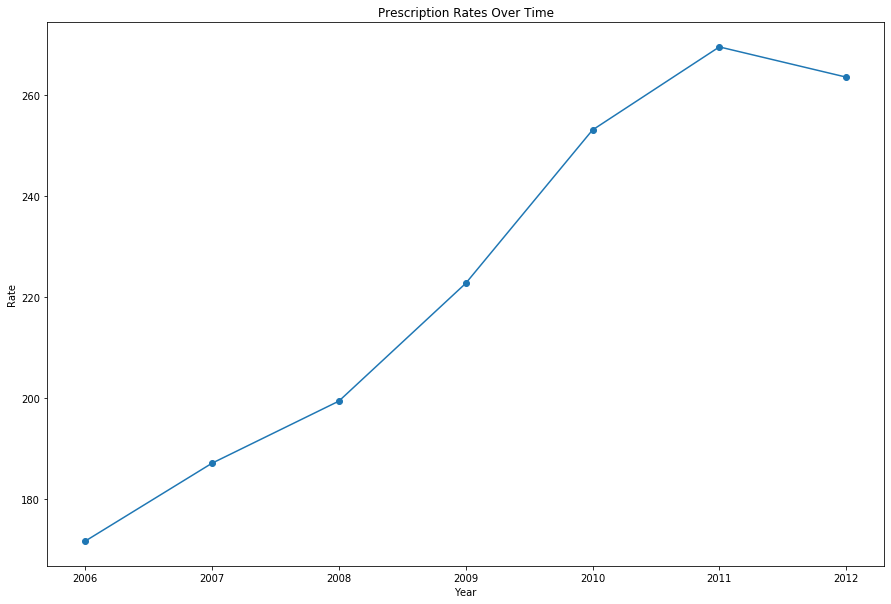

In [53]:
# plot of prescription rates over time
plt.plot(pr_avg.index, pr_avg, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Prescription Rates Over Time')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

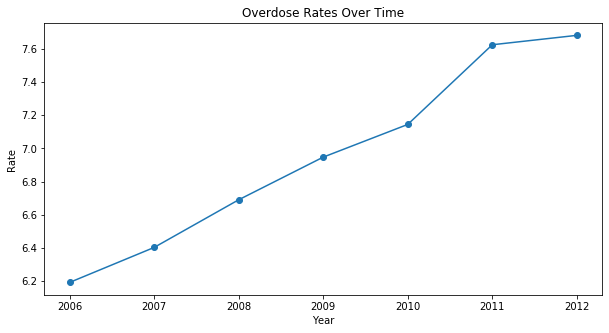

In [54]:
# overdose rates over time
plt.plot(od_avg.index, od_avg, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Overdose Rates Over Time')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

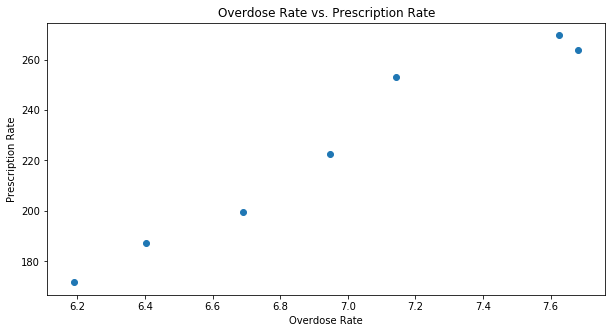

In [55]:
# same data as scatter plot
# we have here a correlation, not a trend - therefore, scatter plot is more appropriate
plt.scatter(od_avg, pr_avg)
plt.xlabel('Overdose Rate')
plt.ylabel('Prescription Rate')
plt.title('Overdose Rate vs. Prescription Rate')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

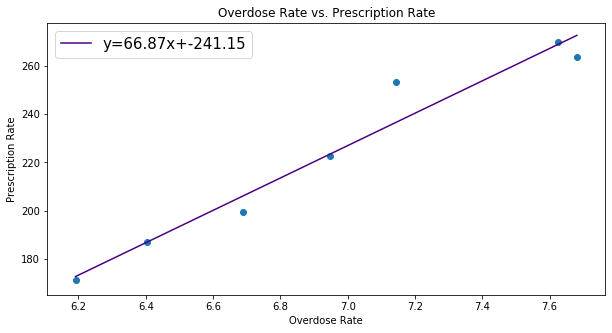

In [56]:
#now add a fit line
m, b, r_value, p_value, std_err = stats.linregress(od_avg,pr_avg)
y = m*od_avg+b
plt.plot(od_avg, y, 'indigo', label='y={:.2f}x+{:.2f}'.format(m,b))
plt.scatter(od_avg, pr_avg)
plt.xlabel('Overdose Rate')
plt.ylabel('Prescription Rate')
plt.title('Overdose Rate vs. Prescription Rate')
plt.legend(fontsize=15)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [57]:
pain_df = pd.concat([od_avg, pr_avg], axis=1)

In [58]:
pain_df

,0,1
year,,
2006,6.191436,171.631862
2007,6.402391,187.076567
2008,6.689709,199.382779
2009,6.946864,222.723407
2010,7.144071,253.134347
2011,7.624395,269.600382
2012,7.681084,263.611656


In [59]:
pain_df.rename(columns = {0:'overdose_rate', 1:'prescription_rate'},inplace=True)

In [60]:
pain_df

,overdose_rate,prescription_rate
year,,
2006,6.191436,171.631862
2007,6.402391,187.076567
2008,6.689709,199.382779
2009,6.946864,222.723407
2010,7.144071,253.134347
2011,7.624395,269.600382
2012,7.681084,263.611656


In [61]:
# pain coefficient = normalized overdose rate or overdose prescription rate or pain ratio
pain_df['pain_ratio'] = (pain_df['overdose_rate'] / pain_df['prescription_rate']) * 100

In [62]:
pain_df

,overdose_rate,prescription_rate,pain_ratio
year,,,
2006,6.191436,171.631862,3.607393
2007,6.402391,187.076567,3.422337
2008,6.689709,199.382779,3.355209
2009,6.946864,222.723407,3.119054
2010,7.144071,253.134347,2.822245
2011,7.624395,269.600382,2.828036
2012,7.681084,263.611656,2.913788


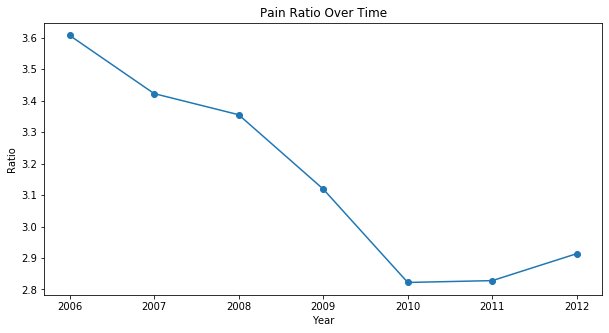

In [63]:
# graph pain ratio over time
plt.plot(pain_df.index, pain_df['pain_ratio'], marker = 'o')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Pain Ratio Over Time')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [64]:
#Now create graphs with top states
#First, find what the top states are
df['pain_ratio'] = (df['overdose_rate'] / df['prescription_rate']) * 100
pain_avg = df.groupby('state')['pain_ratio'].mean()
pain_head = pain_avg.sort_values(ascending=False).head(5)
pain_head

state
District of Columbia    6.431225
Illinois                6.378556
Rhode Island            5.986685
New Mexico              5.973505
Utah                    5.827214
Name: pain_ratio, dtype: float64

In [65]:
#create variables for each state
pr_dc = df[df.state == 'District of Columbia']
pr_il = df[df.state == 'Illinois']
pr_nm = df[df.state == 'New Mexico']
pr_ri = df[df.state == 'Rhode Island']
pr_ut = df[df.state == 'Utah']

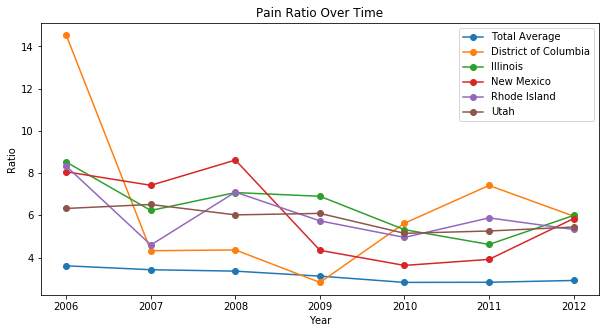

In [66]:
#now graph all together
# graph pain ratio over time
p1 = plt.plot(pain_df.index, pain_df['pain_ratio'], marker = 'o')
p2 = plt.plot(pr_dc.year, pr_dc.pain_ratio, marker = 'o')
p3 = plt.plot(pr_il.year, pr_il.pain_ratio, marker = 'o')
p4 = plt.plot(pr_nm.year, pr_nm.pain_ratio, marker = 'o')
p5 = plt.plot(pr_ri.year, pr_ri.pain_ratio, marker = 'o')
p6 = plt.plot(pr_ut.year, pr_ut.pain_ratio, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Pain Ratio Over Time')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Total Average', 'District of Columbia', 'Illinois', 'New Mexico', 'Rhode Island', 'Utah'))
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [67]:
df[df.state == 'District of Columbia']

,state,year,deaths,pop,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),QUANTITY,prescription_rate,overdose_rate,pain_ratio
56,District of Columbia,2006,62,570681,10.9,8.3,13.9,174,427.0,74.822887,10.864213,14.519906
57,District of Columbia,2007,29,574404,5,3.4,7.3,184,671.0,116.816735,5.048711,4.321908
58,District of Columbia,2008,33,580236,5.7,3.9,8,196,757.0,130.464156,5.687341,4.359313
59,District of Columbia,2009,13,592228,Unreliable,1.2,3.8,202,461.0,77.841642,2.195101,2.819957
60,District of Columbia,2010,36,601723,6,4.2,8.3,210,640.0,106.361233,5.982819,5.625000
61,District of Columbia,2011,57,617996,9.2,7,11.9,219,769.0,124.434462,9.223361,7.412224
62,District of Columbia,2012,45,632323,7.1,5.2,9.5,217,755.0,119.401002,7.116616,5.960265


In [68]:
# create separate dataframes for each year
pr_2006 = df[df.year == 2006]['prescription_rate']
pr_2007 = df[df.year == 2007]['prescription_rate']
pr_2008 = df[df.year == 2008]['prescription_rate']
pr_2009 = df[df.year == 2009]['prescription_rate']
pr_2010 = df[df.year == 2010]['prescription_rate']
pr_2011 = df[df.year == 2011]['prescription_rate']
pr_2012 = df[df.year == 2012]['prescription_rate']

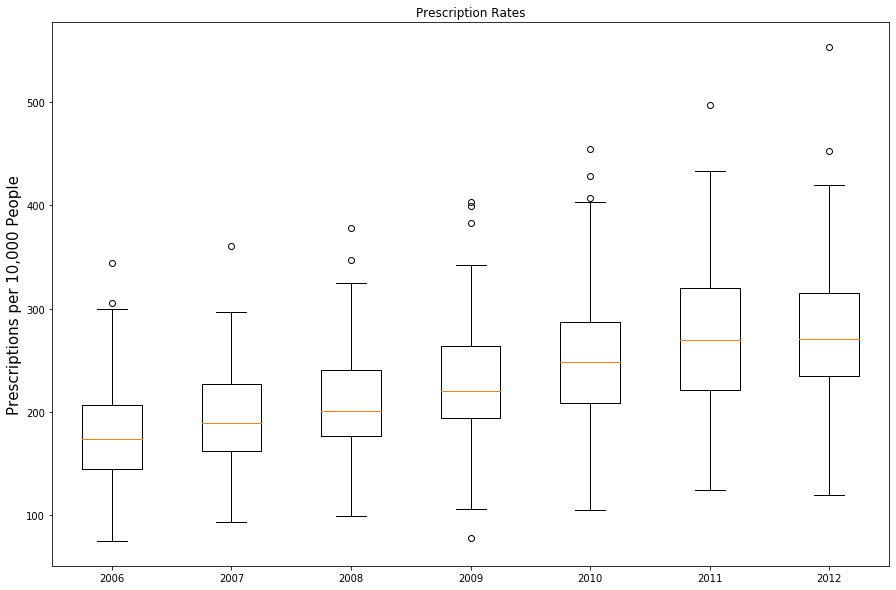

In [69]:
#create box plots for prescription rates over years
data = [pr_2006, pr_2007, pr_2008, pr_2009, pr_2010, pr_2011, pr_2012]
labels = ['2006', '2007', '2008', '2009', '2010', '2011', '2012']
fig1, ax1 = plt.subplots()
ax1.set_title('Prescription Rates')
ax1.boxplot(data, labels = labels)
plt.ylabel('Prescriptions per 10,000 People', fontsize = 15)
plt.show()

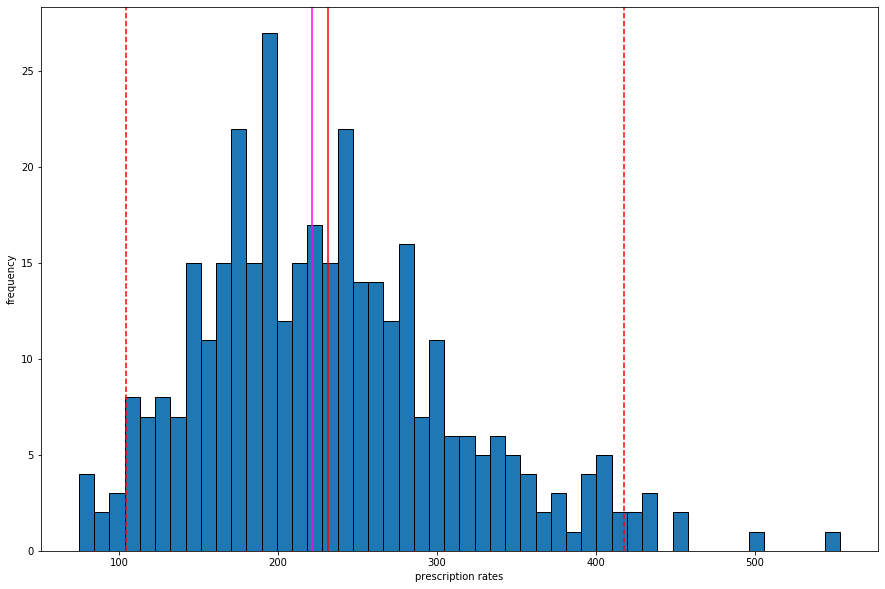

In [70]:
plt.hist(df.prescription_rate, bins = 50, edgecolor='k')
plt.xlabel('prescription rates')
plt.ylabel('frequency')
plt.axvline(df.prescription_rate.mean(), ls='-', color = 'r')
plt.axvline(df.prescription_rate.median(), ls='-', color = 'magenta')
plt.axvline(np.percentile(df.prescription_rate, [2.5, 97.5][0]), ls = '--', color = 'r')
plt.axvline(np.percentile(df.prescription_rate, [2.5, 97.5][1]), ls = '--', color = 'r')

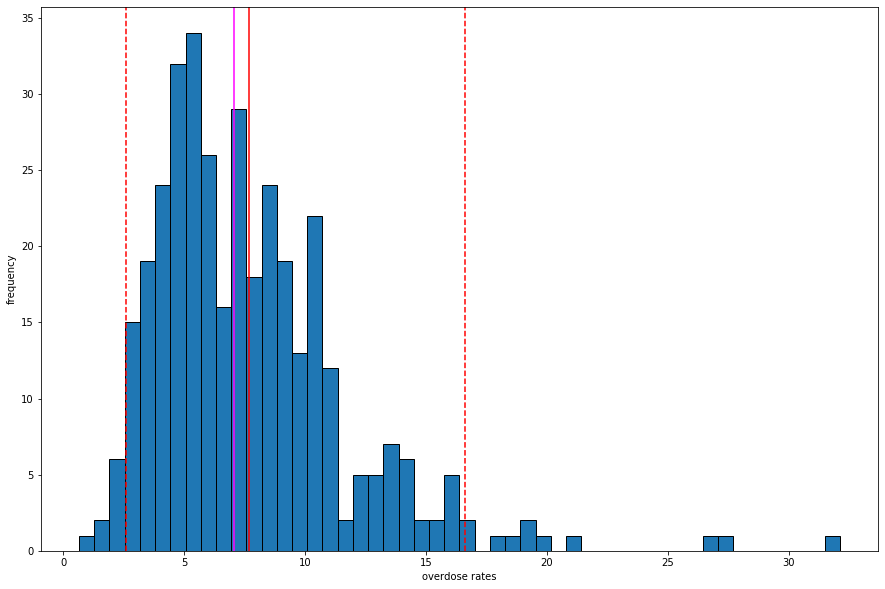

In [71]:
plt.hist(df.overdose_rate, bins = 50, edgecolor='k')
plt.xlabel('overdose rates')
plt.ylabel('frequency')
plt.axvline(df.overdose_rate.mean(), ls='-', color = 'r')
plt.axvline(df.overdose_rate.median(), ls= '-', color = 'magenta')
plt.axvline(np.percentile(df.overdose_rate, [2.5, 97.5][0]), ls = '--', color = 'r')
plt.axvline(np.percentile(df.overdose_rate, [2.5, 97.5][1]), ls = '--', color = 'r')

Text(0, 0.5, 'prescription rate')

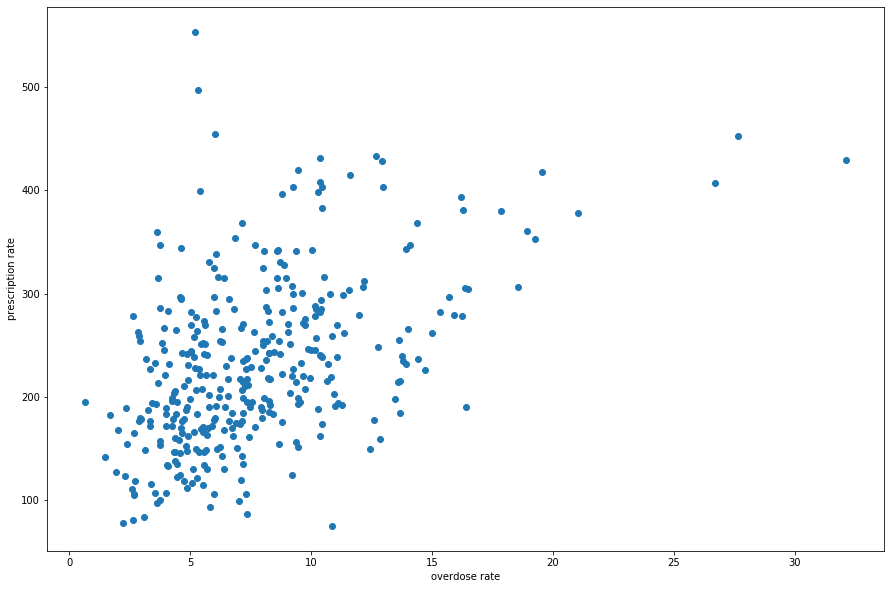

In [73]:
plt.scatter(df.overdose_rate, df.prescription_rate)
plt.xlabel('overdose rate')
plt.ylabel('prescription rate')

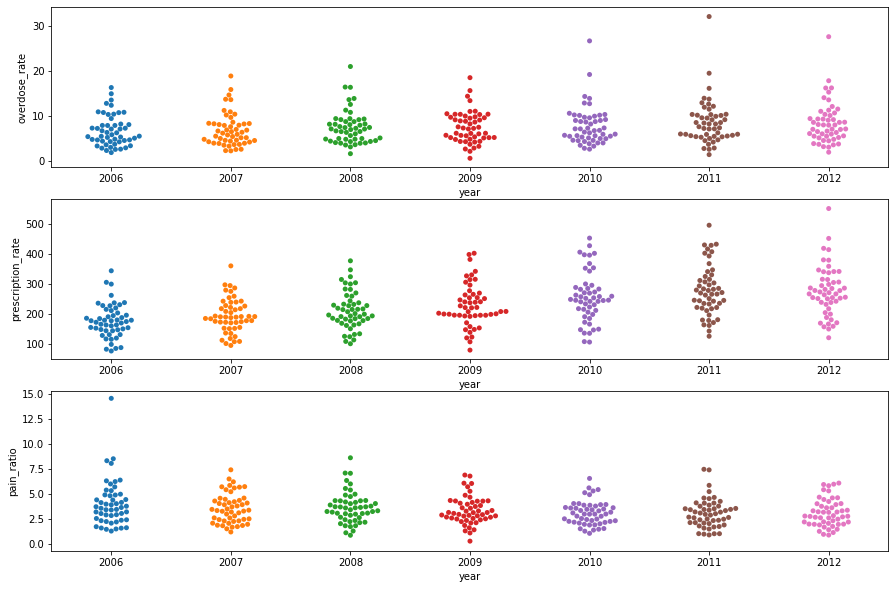

In [74]:
import seaborn as sns

plt.subplot(311)
sns.swarmplot(x=df.year, y=df.overdose_rate)

plt.subplot(312)
sns.swarmplot(x=df.year, y=df.prescription_rate)

plt.subplot(313)
sns.swarmplot(x=df.year, y=df.pain_ratio)

### Issue 3: Statistical Data Analysis

### Part 1) Pain Ratios

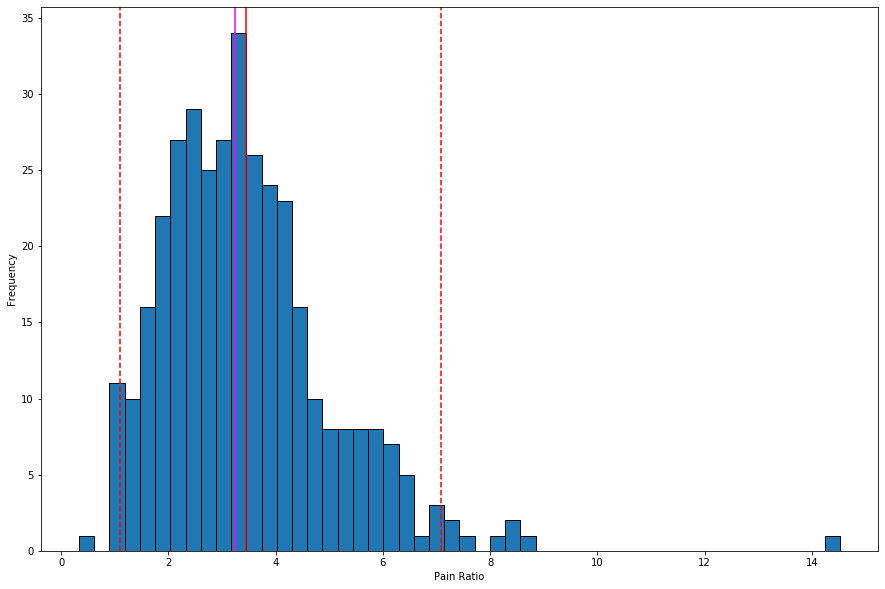

In [72]:
#create histogram for pain ratios
#remember: df['pain_ratio'] = (df['overdose_rate'] / df['prescription_rate']) * 100
plt.hist(df.pain_ratio, bins = 50, edgecolor='k')
plt.xlabel('Pain Ratio')
plt.ylabel('Frequency')
plt.axvline(df.pain_ratio.mean(), ls='-', color = 'r')
plt.axvline(df.pain_ratio.median(), ls= '-', color = 'magenta')
plt.axvline(np.percentile(df.pain_ratio, [2.5, 97.5][0]), ls = '--', color = 'r')
plt.axvline(np.percentile(df.pain_ratio, [2.5, 97.5][1]), ls = '--', color = 'r')

In [75]:
#try Bayesian inference
#pain ratio distribution rate roughly looks exponential (or gamma)
import pymc3 as pm
from scipy.stats import gamma

n_pr = len(df.pain_ratio)
pain_ratio = df.pain_ratio

alpha_est = np.mean(pain_ratio)**2 / np.var(pain_ratio)
beta_est = np.var(pain_ratio) / np.mean(pain_ratio)


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning:


WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [76]:
#draw model with random variates
random.seed(42)
pain_ratio_model_rvs = gamma(alpha_est, scale=beta_est).rvs(n_pr)

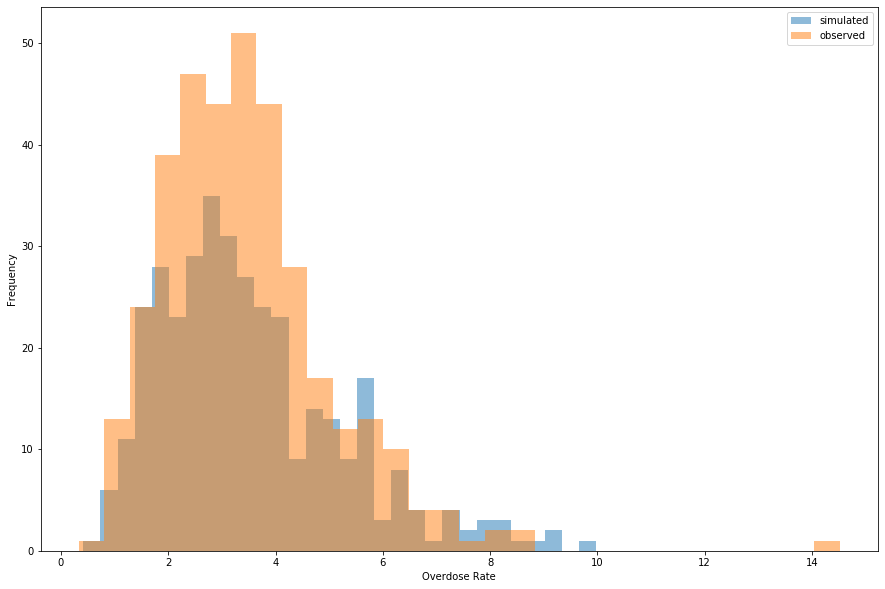

In [77]:
#plot the simulated data and the observed data together
_ = plt.hist(pain_ratio_model_rvs, bins=30, alpha=0.5, label='simulated')
_ = plt.hist(pain_ratio, bins=30, alpha=0.5, label='observed')
_ = plt.xlabel('Overdose Rate')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [78]:
rate_est = 1/beta_est

In [79]:
# start by creating context for model
with pm.Model() as model:
    #now create stochastic variables
    alpha_ = pm.Exponential('alpha', 1/alpha_est)
    rate_ = pm.Exponential('rate', 1/rate_est)
    dist = pm.Gamma('gamma',alpha = alpha_, beta = rate_, observed = pain_ratio)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rate, alpha]
Sampling 4 chains, 0 divergences: 100%|███████████████████████████████████████| 42000/42000 [14:23<00:00, 48.61draws/s]
The acceptance probability does not match the target. It is 0.889726112332274, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8952215423882401, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [80]:
#first discard burn-in period, then assign samples
burned_trace = trace[5000:]
alpha_samples = burned_trace['alpha']
rate_samples = burned_trace['rate']

# beta = 1/rate
beta_samples = 1/rate_samples

In [81]:
#calculate intervals using np.percentile
alpha_ci = np.percentile(alpha_samples, [2.5, 97.5])
beta_ci = np.percentile(beta_samples, [2.5, 97.5])

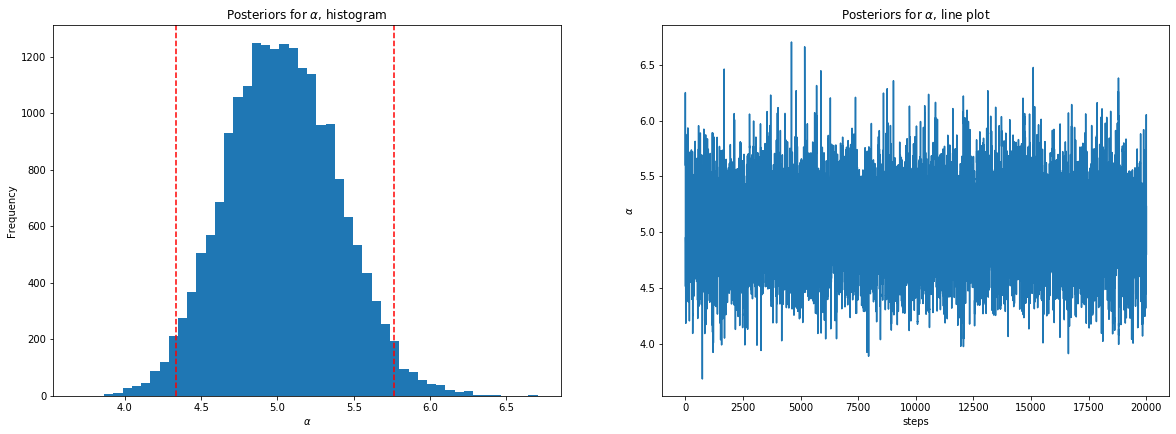

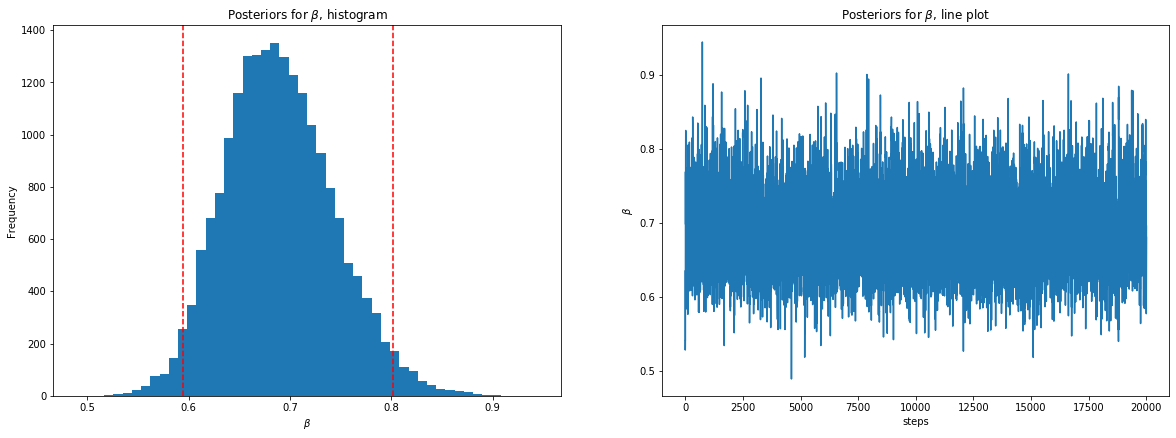

In [82]:
# create plots
#write loops to save time
samples = [alpha_samples, beta_samples]
_ci = [alpha_ci[0], alpha_ci[1], beta_ci[0], beta_ci[1]]
_vars = ['$\\alpha$', '$\\beta$']
_i = [1, 2, 3, 4]

for i in range(2):
    plt.figure(figsize=(20, 15))
    plt.subplot(2, 2, _i[2 * i])
    plt.hist(samples[i], bins=50)
    plt.axvline(_ci[2 * i], color='r', ls='--')
    plt.axvline(_ci[2 * i + 1], color='r', ls='--')
    plt.title('Posteriors for %s, histogram' % _vars[i])
    plt.xlabel('%s' % _vars[i])
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, _i[2 * i + 1])
    plt.plot(samples[i])
    plt.title('Posteriors for %s, line plot' % _vars[i])
    plt.xlabel('steps')
    plt.ylabel('%s' % _vars[i])

In [83]:
# define average alpha and beta values
alpha_mu = np.mean(alpha_samples)
beta_mu = np.mean(beta_samples)

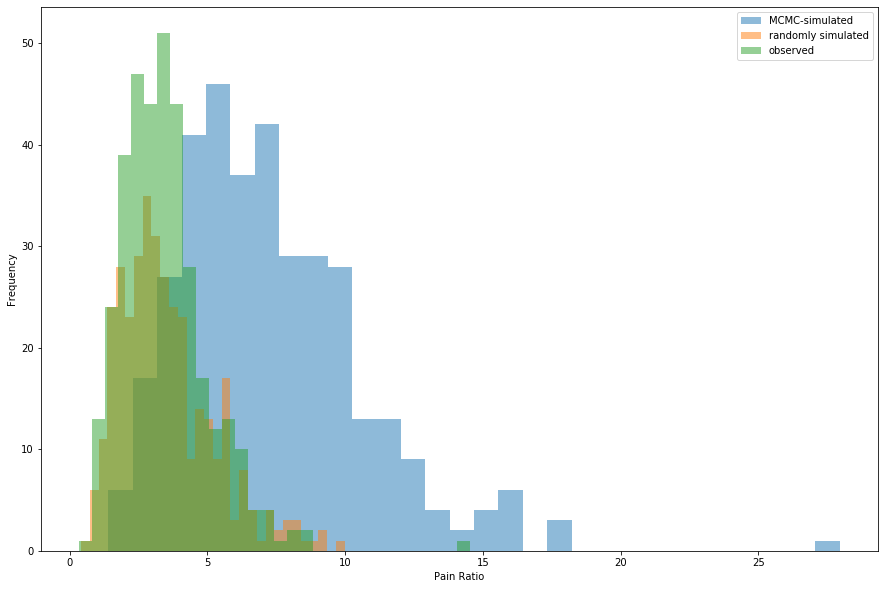

In [85]:
random.seed(42)
#scale = 1/beta
MCMC_simulated = gamma(alpha_mu, scale=1/beta_mu).rvs(n_pr)

#create histograms
_ = plt.hist(MCMC_simulated, bins=30, alpha=0.5, label='MCMC-simulated')
_ = plt.hist(pain_ratio_model_rvs, bins=30, alpha=0.5, label='randomly simulated')
_ = plt.hist(pain_ratio, bins=30, alpha=0.5, label='observed')
_ = plt.xlabel('Pain Ratio')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [86]:
obs_mean = np.mean(pain_ratio)
p = np.sum(MCMC_simulated >= obs_mean) / len(MCMC_simulated)
print('The p-value for the observed mean of overdose rate is {}'.format(p))

if p >= 0.05:
    print('Large p-value confirms the null hypothesis.')
    
else:
    print('Small p-value disproves the null hypothesis.')

The p-value for the observed mean of overdose rate is 0.9215686274509803
Large p-value confirms the null hypothesis.


### Part 2) Bootstrapping to compare demographical groups

In [161]:
# let's try bootstrapping for overdose rates
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data,size=len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates   

In [162]:
data = df.overdose_rate
N_rep = 10000
random.seed(42)

bs_reps = draw_bs_reps(data, np.mean, N_rep)
ci = np.percentile(bs_reps, [2.5, 97.5])
ci

array([224.72132396, 242.46298093])

In [ ]:
#Null hypothesis is that there is no difference in means between groups
#need to shift groups so they have the same mean

"""
male_od = df['overdose_rate_male']
female_od = df['overdose_rate_female']
mean_od = np.mean(np.concatenate((male_od,female_od)))
male_shift = male_od - np.mean(male_od) + mean_od
female_shift = female_od - np.mean(female_od) + mean_od

#Now draw bootstrap replicates
bs_male_reps = draw_bs_reps(male_shift, np.mean, N_rep)
bs_female_reps = draw_bs_reps(female_shift, np.mean, N_rep)
bs_reps = bs_male_reps - bs_female_reps


#Calculate observed difference in means and compare to bs_reps to find p
#If p is under 0.05, null hypothesis is rejected
#Alternative hypothesis - there is a difference between males and females
obs_diff_mean = np.mean(male_od) - np.mean(female_od)
p = np.sum(bs_reps >= obs_diff_mean) / len(bs_reps)
print('The p-value of the observed difference between groups is {}'.format(p))


"""